**CONNECTAR AMB GOOGLE DRIVE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**REVISAR TIPO DE GPU ASIGNADA**

In [4]:
!nvidia-smi
!/usr/local/cuda/bin/nvcc --version

Wed Jun 29 11:34:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**MÓDULOS CON LOS QUE SE VA A TRABAJAR**

In [6]:
import numpy as np # Importamos módulo NumPy
import pandas as pd  #Importamos módulo Pandas
import tensorflow as tf #Importamos módulo TensorFlow
from tensorflow import keras #Importamos Keras
from tensorflow.keras.models import Sequential  ## Building Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout ## Building Model
from tensorflow.keras.optimizers import Adam  ## Training Model
from tensorflow.keras.metrics import categorical_crossentropy  ##Training Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os #Importamos el módulo OS
import csv
import matplotlib.pyplot as plt #Importamos el módulo Matplotlib
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline
from tensorflow.keras.callbacks import TensorBoard # Importamos TensorBoard
# Esta herramienta ayudará a poder valorar la puesta en escena de cada modelo

In [7]:
%tensorflow_version 2.x
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


**CARGAR MODELOS (en caso de tenerlos guardados)**

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model("RUTA/2C_model.h5")

mD1 = load_model("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/Modelos/D1/14C_model_D1.h5")
mD2 = load_model("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/Modelos/D2/14C_model_D2.h5")
mCNN1 = load_model("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/Modelos/CNN1/14C_model_CNN1.h5")
mCNN2 = load_model("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/Modelos/CNN2/14C_model_CNN2.h5")
mCNN3 = load_model("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/Modelos/CNN3/14C_model_CNN3.h5")
mCNN4 = load_model("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/Modelos/CNN4/14C_model_CNN4.h5")

**FUNCIÓN PARA GRAFICAR LA MATRIZ DE CONFUSIÓN**

In [11]:
# Función para graficar la matriz de confusión:
def plot_confusion_matrix(cm, classes, normalize=False, title="Matriz de Confusión", cmap=plt.cm.Blues):
  plt.figure(figsize=(14, 10), dpi=80)
  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print("Matriz de confusión normalizada")
  else:
    print("Matriz de confusión sin normalizar")

  print(cm)

  thresh = cm.max() / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j],
             horizontalalignment="center",
             color="white" if cm [i,j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel("Observaciones")
  plt.xlabel("Predicciones")

**PARÁMETROS GENÉRICOS MODELOS**

In [12]:
e = 10  ## Epochs
n = 7
bs = 2**n  ## Batch Size
ncat = 14
img_h, img_w = (28,28)
nbands = 3  ## Imatges a color, per tant 3 bandes (RGB)

**ESTRUCTURAS DE REDES NEURONALES PROPUESTAS**

In [14]:
mD1 = Sequential([
        Flatten(input_shape=(img_h,img_w,nbands)),
        Dense(units=100, activation="relu"),
        Dense(units=100, activation="relu"),
        Dense(units=ncat, activation="softmax"),
])


# A cambiar, aádir Dropout y quizá cambiar número neuronas en las capas ocultas
mD2 = Sequential([
        Flatten(input_shape=(img_h,img_w,nbands)),
        Dense(units=250, activation="relu"),
        Dropout(0.5),
        Dense(units=250, activation="relu"),
        Dropout(0.5),
        Dense(units=ncat, activation="softmax"),
])

mCNN1 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(units=ncat, activation="softmax"),
])


mCNN2 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=64, kernel_size=(3,3), activation="relu",padding="same"),
        MaxPool2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(units=ncat, activation="softmax"),
])

mCNN3 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=64, kernel_size=(3,3), activation="relu",padding="same"),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(250, activation="relu"),
        Dense(units=ncat, activation="softmax"),
])

mCNN4 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=64, kernel_size=(3,3), activation="relu",padding="same"),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(250, activation="relu"),
        Dense(units=ncat, activation="softmax"),
])


### MODELO QUE YA EXISTA VGG16 POR EJEMPLO

In [ ]:
print("MODELO D1")
mD1.summary()  #Resumen de características del modelo D1

print("MODELO D2")
mD2.summary()  #Resumen de características del modelo D2

print("MODELO CNN1")
mCNN1.summary()  #Resumen de características del modelo CNN1

print("MODELO CNN2")
mCNN2.summary()  #Resumen de características del modelo CNN2

print("MODELO CNN3")
mCNN3.summary()  #Resumen de características del modelo CNN3

print("MODELO CNN4")
mCNN4.summary()  #Resumen de características del modelo CNN4


In [17]:
mD1.compile(
    optimizer = "Adam",  ## Optimitzador més comú
    loss = "categorical_crossentropy",  ## 
    metrics = ["accuracy"]  ## Accuracy 
)

mD2.compile(
    optimizer = "Adam",  ## Optimitzador més comú
    loss = "categorical_crossentropy",  ## 
    metrics = ["accuracy"]  ## Accuracy 
)

mCNN1.compile(
    optimizer = "Adam",  ## Optimitzador més comú
    loss = "categorical_crossentropy",  ## 
    metrics = ["accuracy"]  ## Accuracy 
)

mCNN2.compile(
    optimizer = "Adam",  ## Optimitzador més comú
    loss = "categorical_crossentropy",  ## 
    metrics = ["accuracy"]  ## Accuracy 
)

mCNN3.compile(
    optimizer = "Adam",  ## Optimitzador més comú
    loss = "categorical_crossentropy",  ## 
    metrics = ["accuracy"]  ## Accuracy 
)

mCNN4.compile(
    optimizer = "Adam",  ## Optimitzador més comú
    loss = "categorical_crossentropy",  ## 
    metrics = ["accuracy"]  ## Accuracy 
)

PREPROCESO DE IMAGENES

In [20]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) #tf.keras.applications.vgg16.preprocess_input
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) 

**FUNCIÓN DE COMPROBACIÓN DE IMÁGENES DESPUÉS DE PRETRATAMIENTO+GENERADOR**

In [22]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis("off")
  plt.tight_layout()
  plt.show()

## **2-FOLD CROSSVALIDATION METHOD**

**PARÁMETROS ESPECÍFICOS DEL MODELO 0-1**

In [23]:
train_path_0 = "/content/drive/MyDrive/Capstone_Project/Datos/labelled_images/2-fold/14C/Split_0"
valid_path_1 = "/content/drive/MyDrive/Capstone_Project/Datos/labelled_images/2-fold/14C/Split_1"

train_size_0 = 23621
valid_size_1 = 23617

**GENERADOR DE IMÁGENES**

In [25]:
train_generator_0 = train_datagen.flow_from_directory(train_path_0, target_size=(img_h,img_w), classes=["Ampulla_of_vater","Angiectasia", "Blood_Fresh", "Blood_Hematin", "Erosion", "Erythema", "Foreign_body", "Ileocecal_valve", "Lymphangiectasia", "Normal_clean_mucosa", "Polyp", "Pylorus", "Reduced_mucosal_view", "Ulcer"], batch_size=bs)
valid_generator_1 = valid_datagen.flow_from_directory(directory=valid_path_1, target_size=(img_h,img_w), classes=["Ampulla_of_vater","Angiectasia", "Blood_Fresh", "Blood_Hematin", "Erosion", "Erythema", "Foreign_body", "Ileocecal_valve", "Lymphangiectasia", "Normal_clean_mucosa", "Polyp", "Pylorus", "Reduced_mucosal_view", "Ulcer"], batch_size=bs)
test_generator_1 = valid_datagen.flow_from_directory(directory=valid_path_1, target_size=(img_h,img_w), classes=["Ampulla_of_vater","Angiectasia", "Blood_Fresh", "Blood_Hematin", "Erosion", "Erythema", "Foreign_body", "Ileocecal_valve", "Lymphangiectasia", "Normal_clean_mucosa", "Polyp", "Pylorus", "Reduced_mucosal_view", "Ulcer"], batch_size=bs, shuffle=False)

Found 23621 images belonging to 14 classes.
Found 23617 images belonging to 14 classes.
Found 23617 images belonging to 14 classes.


In [26]:
assert train_generator_0.n == train_size_0
assert valid_generator_1.n == valid_size_1
assert test_generator_1.n == valid_size_1
assert train_generator_0.num_classes == valid_generator_1.num_classes == ncat

REVISAR IMAGENES PARA VER RESULTADO DE PRETRATAMIENTO + GENERADOR

In [37]:
imgs, labels = next(train_generator_0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

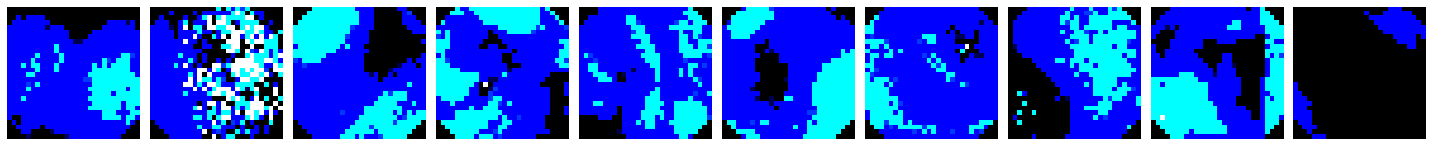

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [38]:
plotImages(imgs)
print(labels)

ENTRENAMIENTO DE MODELOS 0-1

In [39]:
print("MODELO 14C D1")
tensorboardD1 = TensorBoard(log_dir="/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/0-1/D1")
HistD1_0_1 = mD1.fit(
    train_generator_0, 
    validation_data = valid_generator_1,
    epochs = 10,
    callbacks=[tensorboardD1])

print("MODELO 14C D2")
tensorboardD2 = TensorBoard(log_dir="/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/0-1/D2")
HistD2_0_1 = mD2.fit(
    train_generator_0, 
    validation_data = valid_generator_1,
    epochs = 10,
    callbacks=[tensorboardD2])


print("MODELO 14C CNN1")
tensorboardCNN1 = TensorBoard(log_dir="/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/0-1/CNN1")
HistCNN1_0_1 = mCNN1.fit(
    train_generator_0, 
    validation_data = valid_generator_1,
    epochs = 10,
    callbacks=[tensorboardCNN1])

print("MODELO 14C CNN2")
tensorboardCNN2 = TensorBoard(log_dir="/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/0-1/CNN2")
HistCNN2_0_1 = mCNN2.fit(
    train_generator_0, 
    validation_data = valid_generator_1,
    epochs = 10,
    callbacks=[tensorboardCNN2])

print("MODELO 14C CNN3")
tensorboardCNN3 = TensorBoard(log_dir="/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/0-1/CNN3")
HistCNN3_0_1 = mCNN3.fit(
    train_generator_0, 
    validation_data = valid_generator_1,
    epochs = 10,
    callbacks=[tensorboardCNN3])

print("MODELO 14C CNN4")
tensorboardCNN4 = TensorBoard(log_dir="/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/0-1/CNN4")
HistCNN4_0_1 = mCNN4.fit(
    train_generator_0, 
    validation_data = valid_generator_1,
    epochs = 10,
    callbacks=[tensorboardCNN4])

MODELO 14C D1
Epoch 1/10
185/185 [==============================] - 137s 744ms/step - loss: 0.7464 - accuracy: 0.8126 - val_loss: 0.6358 - val_accuracy: 0.8258
Epoch 2/10
185/185 [==============================] - 136s 738ms/step - loss: 0.6635 - accuracy: 0.8288 - val_loss: 0.5830 - val_accuracy: 0.8441
Epoch 3/10
185/185 [==============================] - 137s 741ms/step - loss: 0.6565 - accuracy: 0.8286 - val_loss: 0.6223 - val_accuracy: 0.8364
Epoch 4/10
185/185 [==============================] - 136s 737ms/step - loss: 0.6243 - accuracy: 0.8368 - val_loss: 0.6007 - val_accuracy: 0.8411
Epoch 5/10
185/185 [==============================] - 136s 739ms/step - loss: 0.6237 - accuracy: 0.8379 - val_loss: 0.6586 - val_accuracy: 0.8360
Epoch 6/10
185/185 [==============================] - 136s 739ms/step - loss: 0.6069 - accuracy: 0.8420 - val_loss: 0.5629 - val_accuracy: 0.8492
Epoch 7/10
185/185 [==============================] - 137s 743ms/step - loss: 0.6284 - accuracy: 0.8357 - val_

In [52]:
val_acc_D1_0_1 = list(HistD1_0_1.history["val_accuracy"])
max_val_acc_D1_0_1 = max(val_acc_D1_0_1)

val_acc_D2_0_1 = list(HistD2_0_1.history["val_accuracy"])
max_val_acc_D2_0_1 = max(val_acc_D1_0_1)

val_acc_CNN1_0_1 = list(HistCNN1_0_1.history["val_accuracy"])
max_val_acc_CNN1_0_1 = max(val_acc_CNN1_0_1)

val_acc_CNN2_0_1 = list(HistCNN2_0_1.history["val_accuracy"])
max_val_acc_CNN2_0_1 = max(val_acc_CNN2_0_1)

val_acc_CNN3_0_1 = list(HistCNN3_0_1.history["val_accuracy"])
max_val_acc_CNN3_0_1 = max(val_acc_CNN3_0_1)

val_acc_CNN4_0_1 = list(HistCNN4_0_1.history["val_accuracy"])
max_val_acc_CNN4_0_1 = max(val_acc_CNN4_0_1)

max_acc_0_1 = [max_val_acc_D1_0_1, max_val_acc_D2_0_1, max_val_acc_CNN1_0_1, max_val_acc_CNN2_0_1, max_val_acc_CNN3_0_1, max_val_acc_CNN4_0_1]

PREDICCIÓN MODELO 0-1

In [53]:
print("MODELO 14C D1")
Pred_mD1_0_1 = mD1.predict(test_generator_1, verbose=1)

print("MODELO 14C D2")
Pred_mD2_0_1 = mD2.predict(test_generator_1, verbose=1)

print("MODELO 14C CNN1")
Pred_mCNN1_0_1 = mCNN1.predict(test_generator_1, verbose=1)

print("MODELO 14C CNN2")
Pred_mCNN2_0_1 = mCNN2.predict(test_generator_1, verbose=1)

print("MODELO 14C CNN3")
Pred_mCNN3_0_1 = mCNN3.predict(test_generator_1, verbose=1)

print("MODELO 14C CNN4")
Pred_mCNN4_0_1 = mCNN4.predict(test_generator_1, verbose=1)

MODELO 14C D1
185/185 [==============================] - 69s 370ms/step
MODELO 14C D2
185/185 [==============================] - 70s 377ms/step
MODELO 14C CNN1
185/185 [==============================] - 69s 370ms/step
MODELO 14C CNN2
185/185 [==============================] - 69s 373ms/step
MODELO 14C CNN3
185/185 [==============================] - 70s 378ms/step
MODELO 14C CNN4
185/185 [==============================] - 69s 372ms/step


**MATRICES DE CONFUSIÓN**

In [54]:
# Cálculo de las matrices de confusión para cada una de las estructuras que se han modelado:

# Matriz de confusión para el modelo D1:
cm_D1_0_1 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mD1_0_1, axis=-1)) 

# Matriz de confusión para el modelo D2:
cm_D2_0_1 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mD2_0_1, axis=-1))

# Matriz de confusión para el modelo CNN1:
cm_CNN1_0_1 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mCNN1_0_1, axis=-1))

# Matriz de confusión para el modelo CNN2:
cm_CNN2_0_1 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mCNN2_0_1, axis=-1))

# Matriz de confusión para el modelo CNN3:
cm_CNN3_0_1 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mCNN3_0_1, axis=-1))

# Matriz de confusión para el modelo CNN4:
cm_CNN4_0_1 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mCNN4_0_1, axis=-1))

In [55]:
test_generator_1.class_indices

{'Ampulla_of_vater': 0,
 'Angiectasia': 1,
 'Blood_Fresh': 2,
 'Blood_Hematin': 3,
 'Erosion': 4,
 'Erythema': 5,
 'Foreign_body': 6,
 'Ileocecal_valve': 7,
 'Lymphangiectasia': 8,
 'Normal_clean_mucosa': 9,
 'Polyp': 10,
 'Pylorus': 11,
 'Reduced_mucosal_view': 12,
 'Ulcer': 13}

Matriz de confusión sin normalizar
[[    0     0     0     0     0     0     0     0     0     5     0     0
      0     0]
 [    0    83     8     0     4     0     0     0     0   318     0    11
      0     9]
 [    0     5   137     0     3     0     5    25     0    30     0    13
      0     5]
 [    0     0     0     0     0     0     0     0     0     0     0     6
      0     0]
 [    1     0     2     0    16     0     3     5     0   210     0    16
      0     0]
 [    0     0     0     0     0    17     0     0     0    62     0     0
      0     0]
 [    0     2     0     0     3     0   155    12     3   204     0     5
      2     2]
 [    0     3     2     0     0     4     5  1367     1   668     0     0
     44     0]
 [    1     0     0     0     0     0     7     4    23   257     0     1
      2     1]
 [    2     4     7     0     6     0    42   114     7 16917     1    32
     34     3]
 [    0     0     0     0     0     0     1     9     0     6    11     0
 

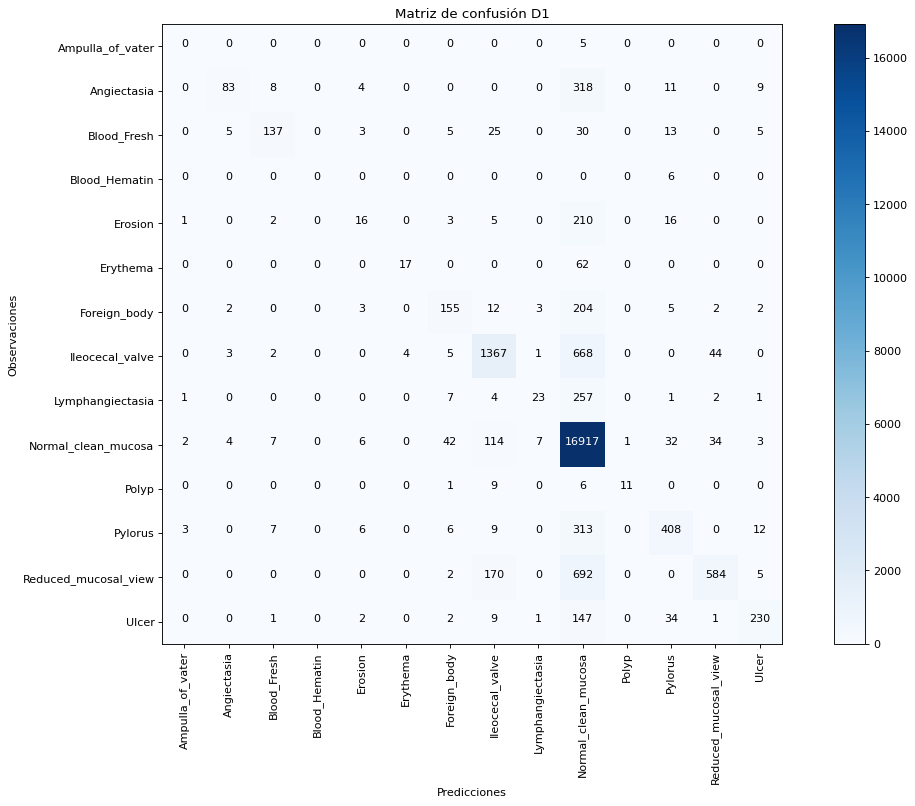

In [56]:
## GENERAR MATRIZ DE CONFUSIÓN
cm_plot_labels = ["Ampulla_of_vater","Angiectasia", "Blood_Fresh", "Blood_Hematin", "Erosion", "Erythema", "Foreign_body", "Ileocecal_valve", "Lymphangiectasia", "Normal_clean_mucosa", "Polyp", "Pylorus", "Reduced_mucosal_view", "Ulcer"]
plot_confusion_matrix(cm=cm_D1_0_1,classes=cm_plot_labels,title="Matriz de confusión D1")

Matriz de confusión sin normalizar
[[    0     0     0     0     0     0     0     0     0     5     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0   433     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0   223     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0     6     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0   253     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0    79     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0   388     0     0
      0     0]
 [    0     0     0     0     0     0     0     1     0  2093     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0   296     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0 17169     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0    27     0     0
 

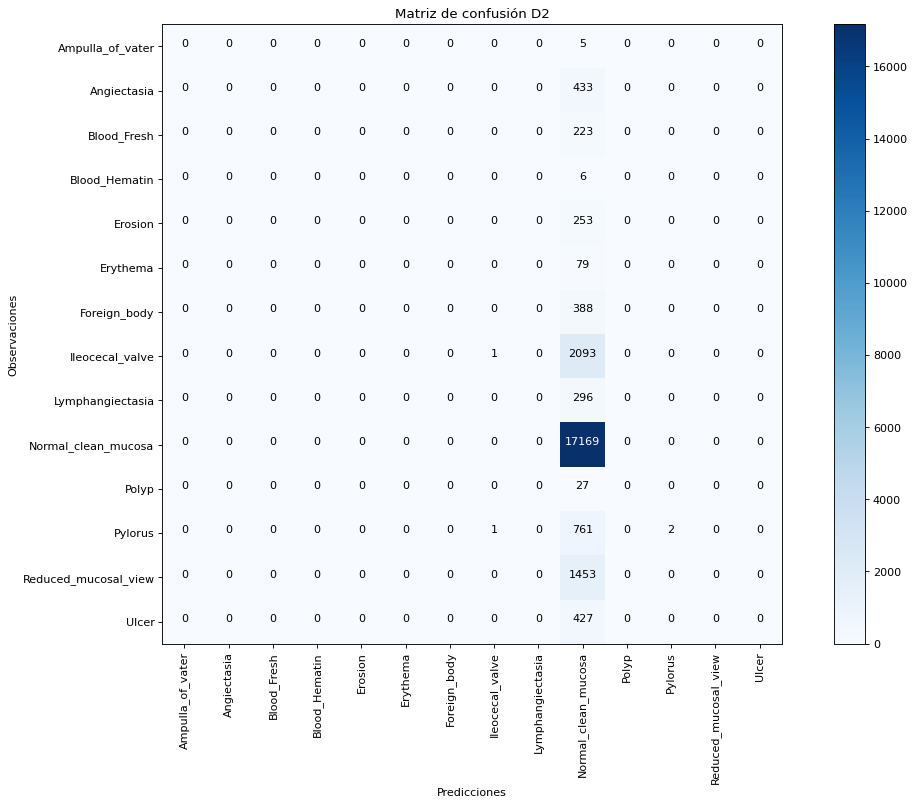

In [57]:
plot_confusion_matrix(cm=cm_D2_0_1,classes=cm_plot_labels,title="Matriz de confusión D2")

Matriz de confusión sin normalizar
[[    5     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0   322     0     0     2     0     0     1     0   100     0     7
      0     1]
 [    0     0   208     0     1     0     0     0     0    10     0     3
      0     1]
 [    0     0     0     6     0     0     0     0     0     0     0     0
      0     0]
 [    0     0     0     0   131     0     0     2     3   101     0     9
      4     3]
 [    0     0     0     0     0    34     0     0     0    43     0     0
      0     2]
 [    0     0     0     0     0     0   293     0     4    88     0     1
      1     1]
 [    0     0     0     0    10     0     3  1302     5   687     1    13
     61    12]
 [    0     0     0     0     2     0     2     1   208    82     0     0
      1     0]
 [    0    21     0     0    54     0    17    37    30 16826     0    81
     61    42]
 [    0     0     0     0     0     0     0     0     0     0    27     0
 

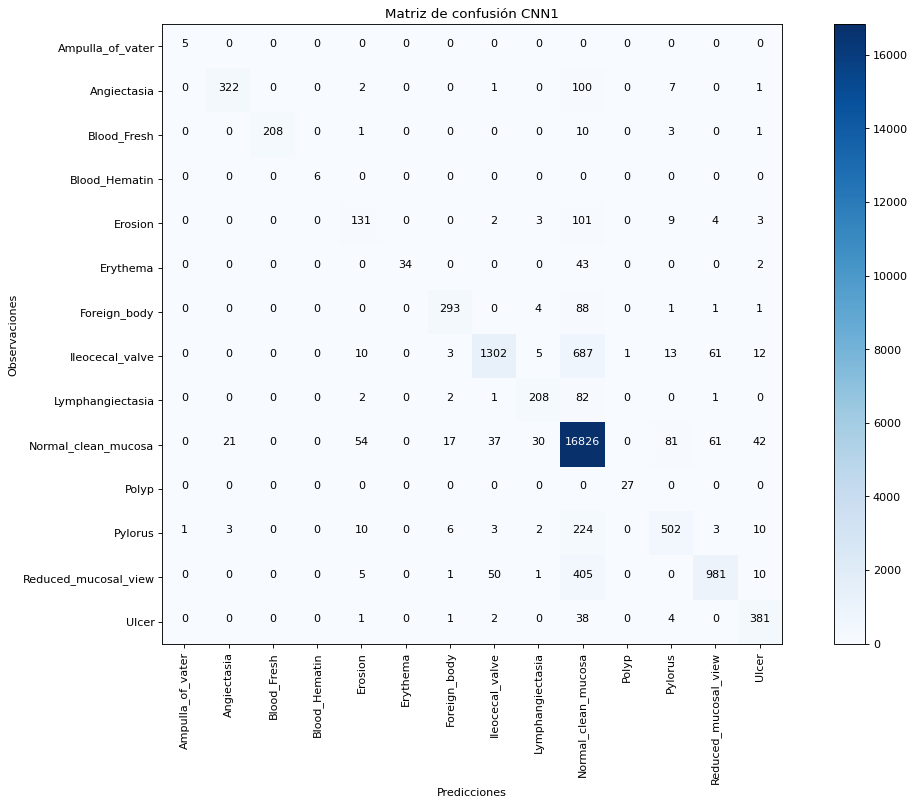

In [58]:
plot_confusion_matrix(cm=cm_CNN1_0_1,classes=cm_plot_labels,title="Matriz de confusión CNN1")

Matriz de confusión sin normalizar
[[    4     0     0     0     0     0     0     0     0     0     0     1
      0     0]
 [    0   346     1     0     1     0     0     0     0    77     0     6
      0     2]
 [    0     3   214     0     0     0     0     0     0     2     0     4
      0     0]
 [    0     0     0     6     0     0     0     0     0     0     0     0
      0     0]
 [    0     1     0     0    79     0     4     7     1   142     0    19
      0     0]
 [    0     0     0     0     0    51     0     0     0    26     0     2
      0     0]
 [    0     3     0     0     1     0   296     3     9    74     0     1
      1     0]
 [    0     0    11     0     2     0     6  1625     2   416     2     4
     23     3]
 [    0     1     0     0     1     0     1     0   236    56     0     1
      0     0]
 [    0    22     1     0     7     1    30    71    29 16863     0   112
     22    11]
 [    0     0     0     0     0     0     0     0     0     0    27     0
 

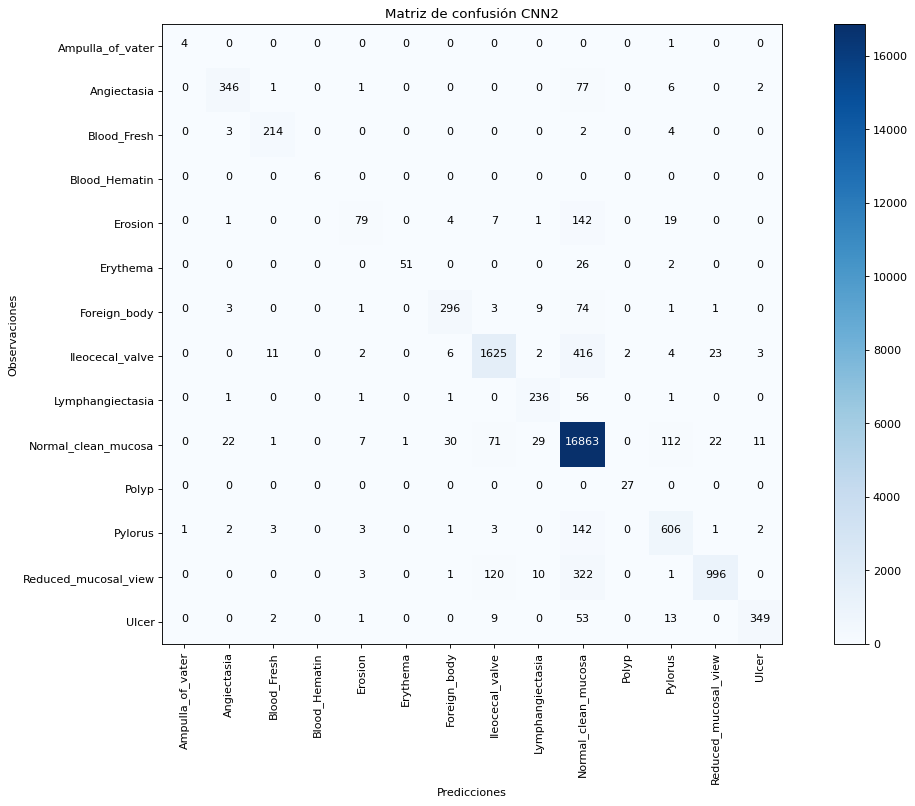

In [59]:
plot_confusion_matrix(cm=cm_CNN2_0_1,classes=cm_plot_labels,title="Matriz de confusión CNN2")

Matriz de confusión sin normalizar
[[    2     0     0     0     0     0     0     0     0     3     0     0
      0     0]
 [    0   391     2     0     2     0     0     4     1    28     0     5
      0     0]
 [    0     0   202     0     0     0     0     4     0    10     0     6
      0     1]
 [    0     0     0     6     0     0     0     0     0     0     0     0
      0     0]
 [    0     0     0     0   209     0     0     0     0    32     0     8
      0     4]
 [    0     0     0     0     1    64     0     0     0    14     0     0
      0     0]
 [    0     0     0     0     1     0   317     3     4    58     1     3
      1     0]
 [    0     1     0     0     3     0     0  1969     0   103     0     0
     18     0]
 [    0     0     0     0     0     1     0     0   265    30     0     0
      0     0]
 [    0     9     0     0    20    18     1    59     4 17016     0    20
      9    13]
 [    0     0     0     0     0     0     0     0     0     0    27     0
 

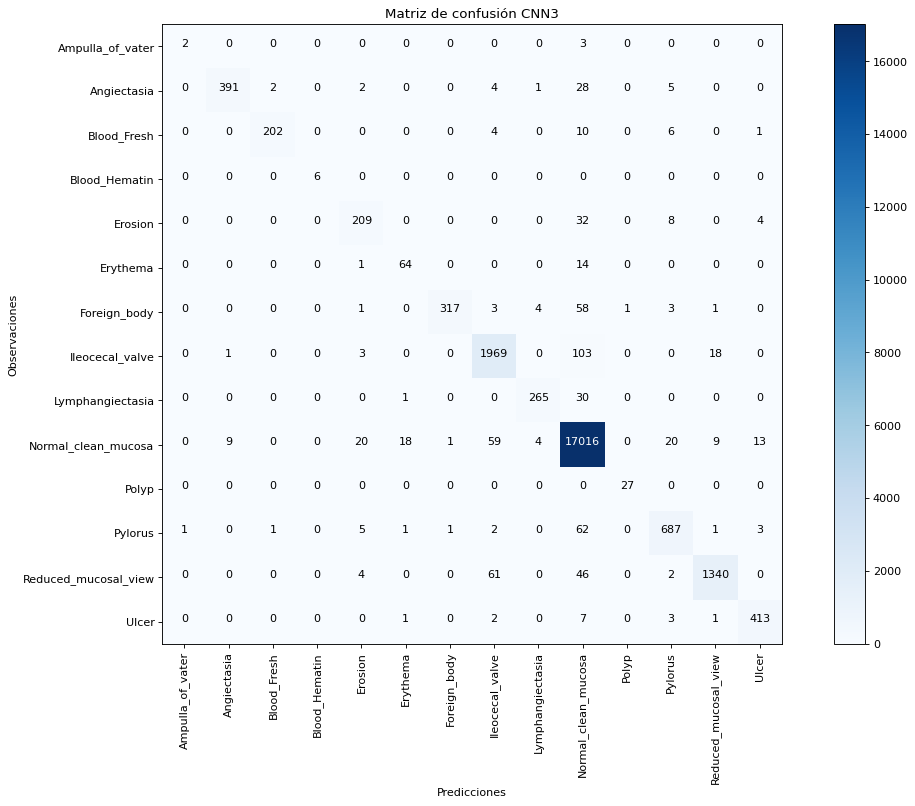

In [60]:
plot_confusion_matrix(cm=cm_CNN3_0_1,classes=cm_plot_labels,title="Matriz de confusión CNN3")

Matriz de confusión sin normalizar
[[    5     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0   396     0     0     4     0     0     0     0    21     0    12
      0     0]
 [    0     1   202     1     1     0     0     1     0     4     0    13
      0     0]
 [    0     0     0     6     0     0     0     0     0     0     0     0
      0     0]
 [    0     0     0     0   225     0     0     0     0    22     0     6
      0     0]
 [    0     0     0     0     0    52     0     1     0    24     0     2
      0     0]
 [    1     0     0     0     3     0   346     0     0    27     0     8
      1     2]
 [    0     0     4     0     4     0     4  1985     0    56     0    12
     20     9]
 [    0     0     0     0     3     0     0     3   248    41     0     1
      0     0]
 [    1     1     1     0    33     0     9    92     3 16811     1   138
     36    43]
 [    0     0     0     0     0     0     0     0     0     0    27     0
 

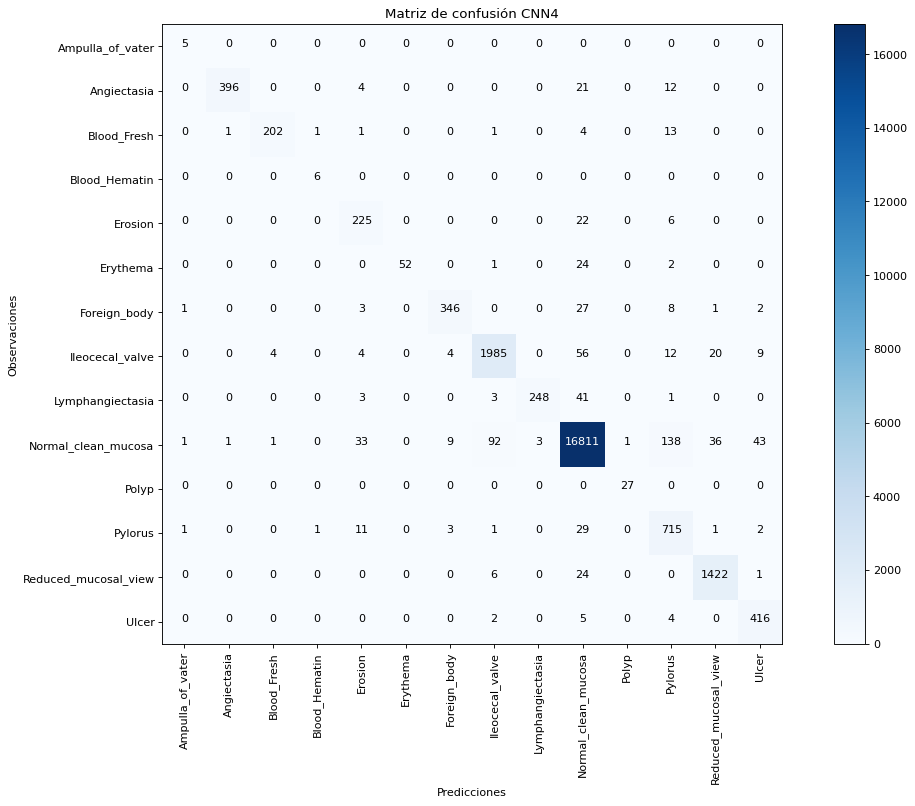

In [61]:
plot_confusion_matrix(cm=cm_CNN4_0_1,classes=cm_plot_labels,title="Matriz de confusión CNN4")

### **2 FOLD - TRAIN = SPLIT_1 // VALIDATION/TEST = SPLIT_0**

In [34]:
train_path_1 = "/content/drive/MyDrive/Capstone_Project/Datos/labelled_images/2-fold/14C/Split_1"
valid_path_0 = "/content/drive/MyDrive/Capstone_Project/Datos/labelled_images/2-fold/14C/Split_0"

train_size_1 = 23617
valid_size_0 = 23621

In [35]:
train_generator_1 = train_datagen.flow_from_directory(train_path_1, target_size=(img_h,img_w), classes=["Ampulla_of_vater","Angiectasia", "Blood_Fresh", "Blood_Hematin", "Erosion", "Erythema", "Foreign_body", "Ileocecal_valve", "Lymphangiectasia", "Normal_clean_mucosa", "Polyp", "Pylorus", "Reduced_mucosal_view", "Ulcer"], batch_size=bs)
valid_generator_0 = valid_datagen.flow_from_directory(directory=valid_path_0, target_size=(img_h,img_w), classes=["Ampulla_of_vater","Angiectasia", "Blood_Fresh", "Blood_Hematin", "Erosion", "Erythema", "Foreign_body", "Ileocecal_valve", "Lymphangiectasia", "Normal_clean_mucosa", "Polyp", "Pylorus", "Reduced_mucosal_view", "Ulcer"], batch_size=bs)
test_generator_0 = valid_datagen.flow_from_directory(directory=valid_path_0, target_size=(img_h,img_w), classes=["Ampulla_of_vater","Angiectasia", "Blood_Fresh", "Blood_Hematin", "Erosion", "Erythema", "Foreign_body", "Ileocecal_valve", "Lymphangiectasia", "Normal_clean_mucosa", "Polyp", "Pylorus", "Reduced_mucosal_view", "Ulcer"], batch_size=bs, shuffle=False)

Found 23617 images belonging to 14 classes.
Found 23621 images belonging to 14 classes.
Found 23621 images belonging to 14 classes.


In [36]:
print("MODELO 14C D1")
tensorboardD1_1_0 = TensorBoard(log_dir="/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/1-0/D1")
HistD1_1_0 = mD1.fit(
    train_generator_1, 
    validation_data = valid_generator_0,
    epochs = 10,
    callbacks=[tensorboardD1_1_0])

print("MODELO 14C D2")
tensorboardD2_1_0 = TensorBoard(log_dir="/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/1-0/D2")
HistD2_1_0 = mD2.fit(
    train_generator_1, 
    validation_data = valid_generator_0,
    epochs = 10,
    callbacks=[tensorboardD2_1_0])

print("MODELO 14C CNN1")
tensorboardCNN1_1_0 = TensorBoard(log_dir="/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/1-0/CNN1")
HistCNN1_1_0 = mCNN1.fit(
    train_generator_1, 
    validation_data = valid_generator_0,
    epochs = 10,
    callbacks=[tensorboardCNN1_1_0])

print("MODELO 14C CNN2")
tensorboardCNN2_1_0 = TensorBoard(log_dir="/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/1-0/CNN2")
HistCNN2_1_0 = mCNN2.fit(
    train_generator_1, 
    validation_data = valid_generator_0,
    epochs = 10,
    callbacks=[tensorboardCNN2_1_0])

print("MODELO 14C CNN3")
tensorboardCNN3_1_0 = TensorBoard(log_dir="/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/1-0/CNN3")
HistCNN3_1_0 = mCNN3.fit(
    train_generator_1, 
    validation_data = valid_generator_0,
    epochs = 10,
    callbacks=[tensorboardCNN3_1_0])

print("MODELO 14C CNN4")
tensorboardCNN4_1_0 = TensorBoard(log_dir="/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/1-0/CNN4")
HistCNN4_1_0 = mCNN4.fit(
    train_generator_1, 
    validation_data = valid_generator_0,
    epochs = 10,
    callbacks=[tensorboardCNN4_1_0])

MODELO 14C D1
Epoch 1/10
185/185 [==============================] - 16590s 90s/step - loss: 6.5736 - accuracy: 0.6604 - val_loss: 2.0099 - val_accuracy: 0.6915
Epoch 2/10
185/185 [==============================] - 138s 750ms/step - loss: 1.8900 - accuracy: 0.7152 - val_loss: 1.7633 - val_accuracy: 0.7572
Epoch 3/10
185/185 [==============================] - 137s 743ms/step - loss: 1.3276 - accuracy: 0.7461 - val_loss: 1.3573 - val_accuracy: 0.7340
Epoch 4/10
185/185 [==============================] - 136s 735ms/step - loss: 1.0186 - accuracy: 0.7716 - val_loss: 0.9527 - val_accuracy: 0.7910
Epoch 5/10
185/185 [==============================] - 136s 739ms/step - loss: 0.8533 - accuracy: 0.7934 - val_loss: 0.8547 - val_accuracy: 0.8088
Epoch 6/10
185/185 [==============================] - 136s 735ms/step - loss: 0.7804 - accuracy: 0.8038 - val_loss: 0.8379 - val_accuracy: 0.8071
Epoch 7/10
185/185 [==============================] - 136s 739ms/step - loss: 0.7347 - accuracy: 0.8137 - val_

In [40]:
val_acc_D1_1_0 = list(HistD1_1_0.history["val_accuracy"])
max_val_acc_D1_1_0 = max(val_acc_D1_1_0)

val_acc_D2_1_0 = list(HistD2_1_0.history["val_accuracy"])
max_val_acc_D2_1_0 = max(val_acc_D1_1_0)

val_acc_CNN1_1_0 = list(HistCNN1_1_0.history["val_accuracy"])
max_val_acc_CNN1_1_0 = max(val_acc_CNN1_1_0)

val_acc_CNN2_1_0 = list(HistCNN2_1_0.history["val_accuracy"])
max_val_acc_CNN2_1_0 = max(val_acc_CNN2_1_0)

val_acc_CNN3_1_0 = list(HistCNN3_1_0.history["val_accuracy"])
max_val_acc_CNN3_1_0 = max(val_acc_CNN3_1_0)

val_acc_CNN4_1_0 = list(HistCNN4_1_0.history["val_accuracy"])
max_val_acc_CNN4_1_0 = max(val_acc_CNN4_1_0)

max_acc_1_0 = [max_val_acc_D1_1_0, max_val_acc_D2_1_0, max_val_acc_CNN1_1_0, max_val_acc_CNN2_1_0, max_val_acc_CNN3_1_0, max_val_acc_CNN4_1_0]

**PREDICCIÓN MODELO 1-0**

In [41]:
print("MODELO 14C D1")
Pred_mD1_1_0 = mD1.predict(test_generator_0, verbose=1)

print("MODELO 14C D2")
Pred_mD2_1_0 = mD2.predict(test_generator_0, verbose=1)

print("MODELO 14C CNN1")
Pred_mCNN1_1_0 = mCNN1.predict(test_generator_0, verbose=1)

print("MODELO 14C CNN2")
Pred_mCNN2_1_0 = mCNN2.predict(test_generator_0, verbose=1)

print("MODELO 14C CNN3")
Pred_mCNN3_1_0 = mCNN3.predict(test_generator_0, verbose=1)

print("MODELO 14C CNN4")
Pred_mCNN4_1_0 = mCNN4.predict(test_generator_0, verbose=1)

MODELO 14C D1
185/185 [==============================] - 69s 373ms/step
MODELO 14C D2
185/185 [==============================] - 70s 376ms/step
MODELO 14C CNN1
185/185 [==============================] - 69s 375ms/step
MODELO 14C CNN2
185/185 [==============================] - 69s 372ms/step
MODELO 14C CNN3
185/185 [==============================] - 69s 373ms/step
MODELO 14C CNN4
185/185 [==============================] - 69s 372ms/step


In [42]:
# Cálculo de las matrices de confusión para cada una de las estructuras que se han modelado:

# Matriz de confusión para el modelo D1:
cm_D1_1_0 = confusion_matrix(y_true=test_generator_0.classes, y_pred=np.argmax(Pred_mD1_1_0, axis=-1)) 

# Matriz de confusión para el modelo D2:
cm_D2_1_0 = confusion_matrix(y_true=test_generator_0.classes, y_pred=np.argmax(Pred_mD2_1_0, axis=-1))

# Matriz de confusión para el modelo CNN1:
cm_CNN1_1_0 = confusion_matrix(y_true=test_generator_0.classes, y_pred=np.argmax(Pred_mCNN1_1_0, axis=-1))

# Matriz de confusión para el modelo CNN2:
cm_CNN2_1_0 = confusion_matrix(y_true=test_generator_0.classes, y_pred=np.argmax(Pred_mCNN2_1_0, axis=-1))

# Matriz de confusión para el modelo CNN3:
cm_CNN3_1_0 = confusion_matrix(y_true=test_generator_0.classes, y_pred=np.argmax(Pred_mCNN3_1_0, axis=-1))

# Matriz de confusión para el modelo CNN4:
cm_CNN4_1_0 = confusion_matrix(y_true=test_generator_0.classes, y_pred=np.argmax(Pred_mCNN4_1_0, axis=-1))

In [45]:
test_generator_1.class_indices

{'Ampulla_of_vater': 0,
 'Angiectasia': 1,
 'Blood_Fresh': 2,
 'Blood_Hematin': 3,
 'Erosion': 4,
 'Erythema': 5,
 'Foreign_body': 6,
 'Ileocecal_valve': 7,
 'Lymphangiectasia': 8,
 'Normal_clean_mucosa': 9,
 'Polyp': 10,
 'Pylorus': 11,
 'Reduced_mucosal_view': 12,
 'Ulcer': 13}

Matriz de confusión sin normalizar
[[    0     0     1     0     0     0     0     0     0     4     0     0
      0     0]
 [    0    84     6     0     7     0     0     0     0   313     0    14
      0     9]
 [    0     4   143     0     4     0     6    24     0    30     0     5
      0     7]
 [    0     0     0     0     1     0     0     0     0     0     0     5
      0     0]
 [    1     0     3     0    18     0     0     6     1   206     0    14
      3     1]
 [    0     0     0     0     0    17     0     0     0    63     0     0
      0     0]
 [    0     0     0     0     2     0   177    14     2   184     0     4
      0     5]
 [    0     1     0     0     1     2     2  1418     2   635     0     1
     33     0]
 [    1     0     1     0     0     0     9     0    33   249     0     2
      1     0]
 [    1     2     5     0     1     1    21    79    11 17007     0    19
     17     5]
 [    0     0     0     0     0     0     1     9     0     5    13     0
 

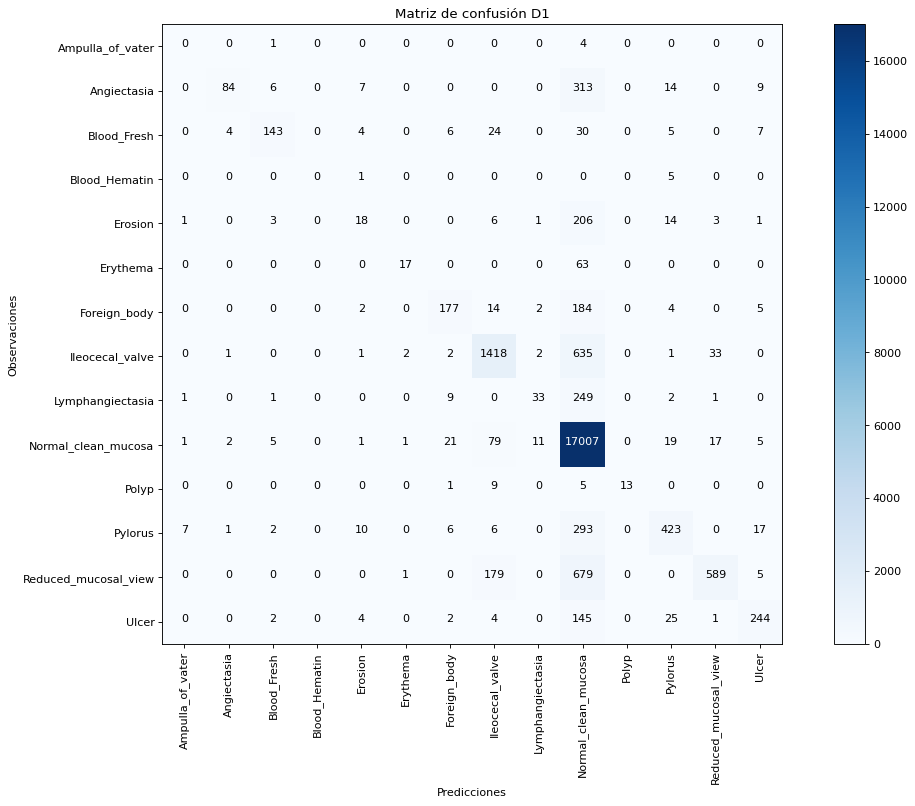

In [46]:
## GENERAR MATRIZ DE CONFUSIÓN
cm_plot_labels = ["Ampulla_of_vater","Angiectasia", "Blood_Fresh", "Blood_Hematin", "Erosion", "Erythema", "Foreign_body", "Ileocecal_valve", "Lymphangiectasia", "Normal_clean_mucosa", "Polyp", "Pylorus", "Reduced_mucosal_view", "Ulcer"]
plot_confusion_matrix(cm=cm_D1_1_0,classes=cm_plot_labels,title="Matriz de confusión D1")

Matriz de confusión sin normalizar
[[    0     0     0     0     0     0     0     0     0     5     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0   433     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0   223     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0     6     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0   253     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0    80     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0   388     0     0
      0     0]
 [    0     0     0     0     0     0     0     1     0  2094     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0   296     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0 17169     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0    28     0     0
 

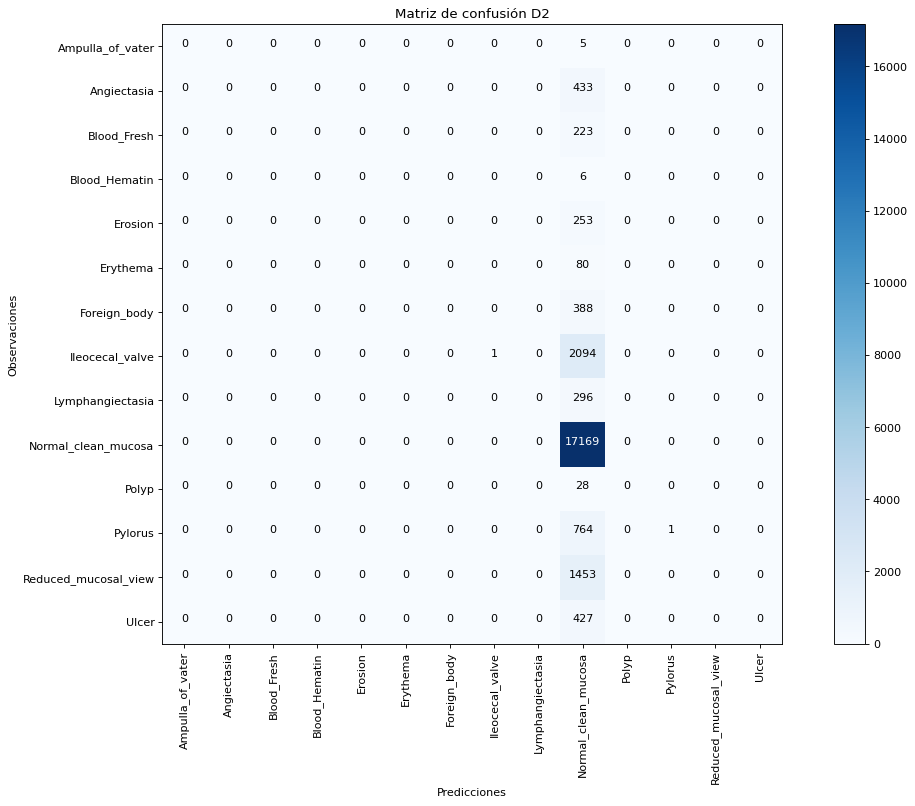

In [47]:
plot_confusion_matrix(cm=cm_D2_1_0,classes=cm_plot_labels,title="Matriz de confusión D2")

Matriz de confusión sin normalizar
[[    5     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0   355     0     0     1     0     0     0     0    75     0     2
      0     0]
 [    0     0   218     0     0     0     0     1     0     3     0     1
      0     0]
 [    0     0     0     6     0     0     0     0     0     0     0     0
      0     0]
 [    0     0     0     0   178     0     0     0     0    72     0     3
      0     0]
 [    0     0     0     0     1    33     0     0     0    45     0     1
      0     0]
 [    0     0     0     0     0     0   358     0     0    30     0     0
      0     0]
 [    0     4     0     0    11     0     2  1439     0   584     0     9
     36    10]
 [    0     0     0     0     0     0     2     0   249    45     0     0
      0     0]
 [    0     7     0     0    15     0     4     8     5 17042     0    55
     21    12]
 [    0     0     0     0     0     0     0     0     0     0    28     0
 

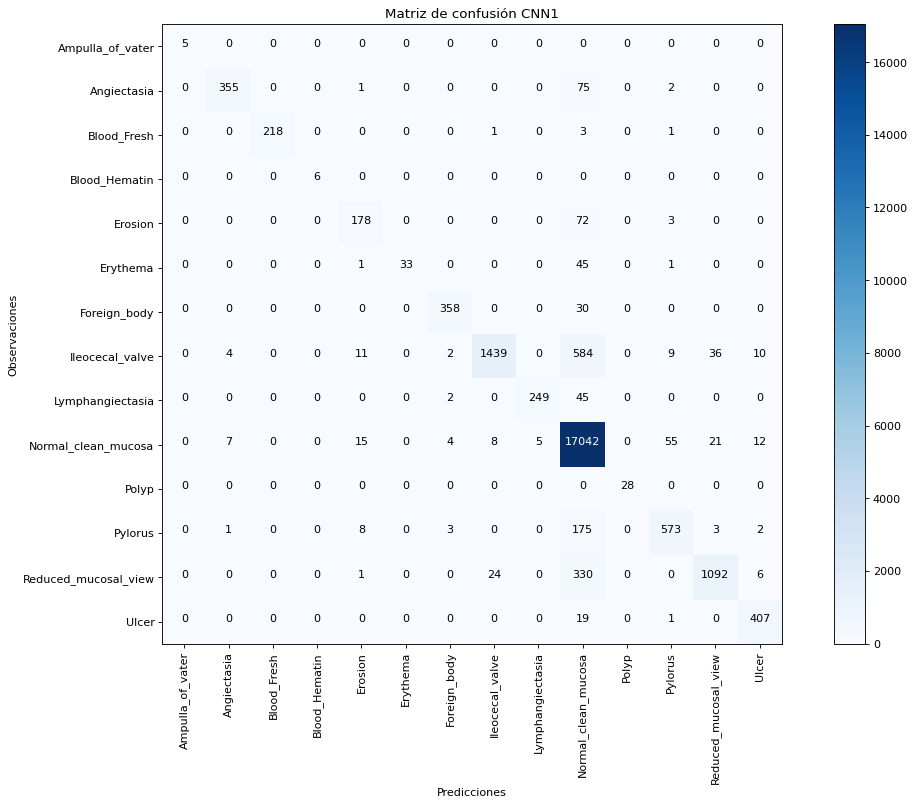

In [48]:
plot_confusion_matrix(cm=cm_CNN1_1_0,classes=cm_plot_labels,title="Matriz de confusión CNN1")

Matriz de confusión sin normalizar
[[    5     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0   377     0     0     0     0     0     0     0    51     0     5
      0     0]
 [    0     0   223     0     0     0     0     0     0     0     0     0
      0     0]
 [    0     0     0     6     0     0     0     0     0     0     0     0
      0     0]
 [    0     1     0     0   127     0     0     5     1   108     0    11
      0     0]
 [    0     0     0     0     0    57     0     0     0    22     0     1
      0     0]
 [    0     0     0     0     0     0   355     1     1    30     0     1
      0     0]
 [    0     0     6     0     0     0     2  1721     1   354     0     5
      6     0]
 [    0     0     0     0     0     0     0     0   276    20     0     0
      0     0]
 [    0     0     1     0     4     0    10    35     6 17038     0    67
      7     1]
 [    0     0     0     0     0     0     0     0     0     0    28     0
 

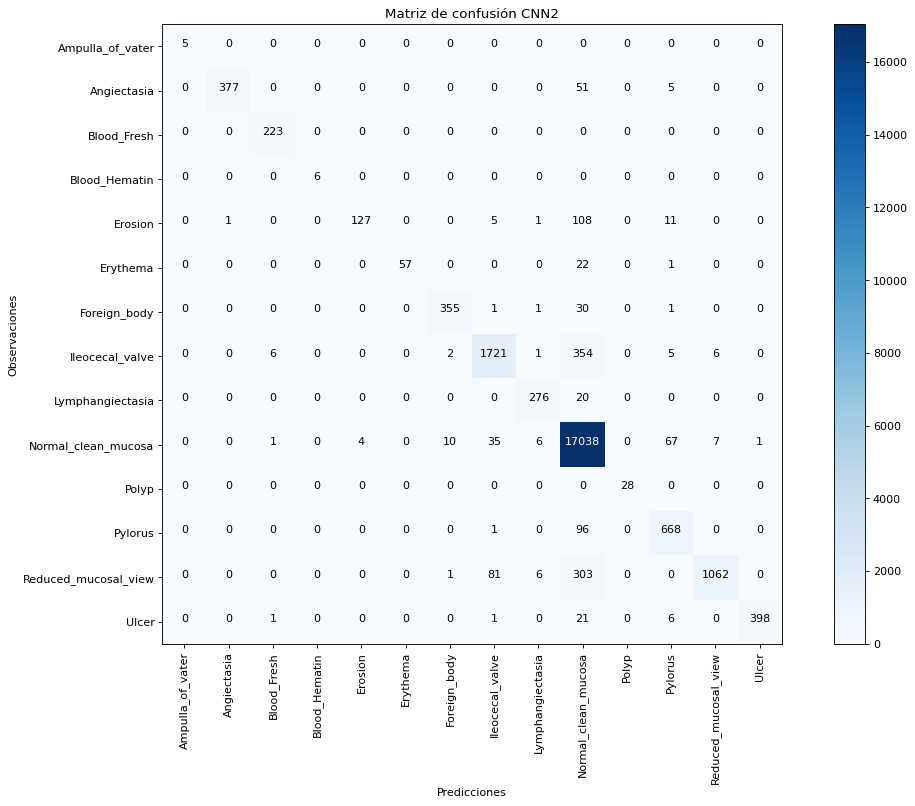

In [49]:
plot_confusion_matrix(cm=cm_CNN2_1_0,classes=cm_plot_labels,title="Matriz de confusión CNN2")

Matriz de confusión sin normalizar
[[    4     0     0     0     0     0     0     0     0     1     0     0
      0     0]
 [    0   416     0     0     0     0     0     1     0    15     0     1
      0     0]
 [    0     0   217     0     0     0     0     2     0     3     0     1
      0     0]
 [    0     0     0     4     1     0     0     0     0     0     0     1
      0     0]
 [    0     0     0     0   248     0     0     0     0     2     0     2
      0     1]
 [    0     0     0     0     0    74     0     0     0     6     0     0
      0     0]
 [    0     0     0     0     0     1   361     2     2    19     0     2
      1     0]
 [    0     0     0     0     0     1     0  2070     0    23     0     0
      0     1]
 [    0     0     0     0     2     1     0     0   287     6     0     0
      0     0]
 [    0     1     0     0     6     4     1    26     2 17113     0     8
      3     5]
 [    0     0     0     0     0     0     0     0     0     0    28     0
 

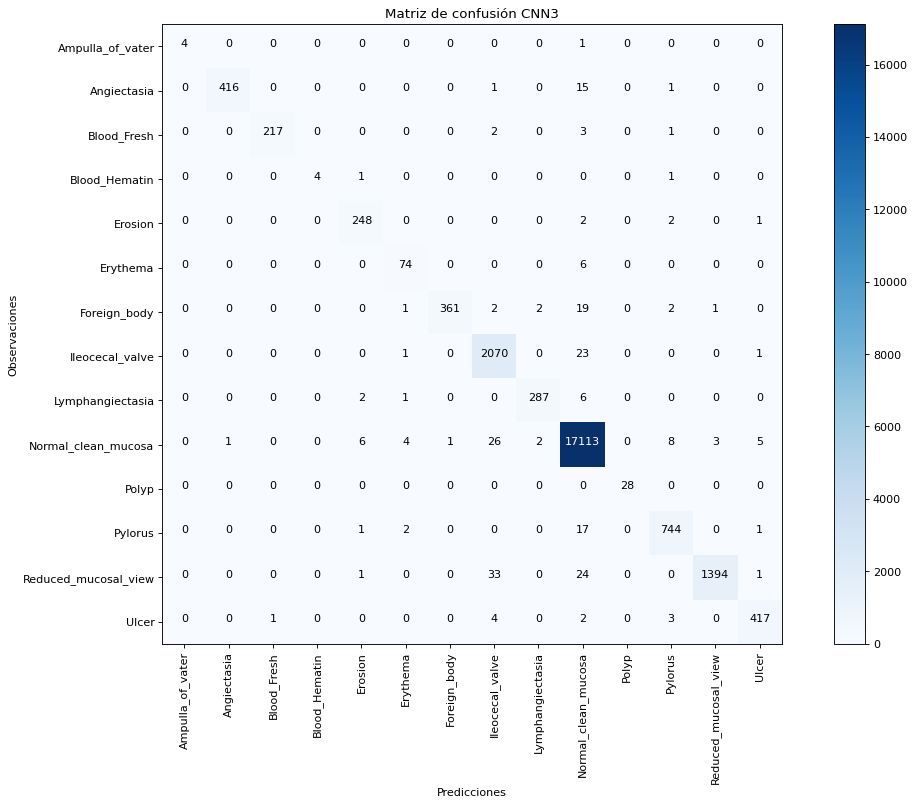

In [50]:
plot_confusion_matrix(cm=cm_CNN3_1_0,classes=cm_plot_labels,title="Matriz de confusión CNN3")

Matriz de confusión sin normalizar
[[    5     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0   427     0     0     0     0     0     0     0     5     0     1
      0     0]
 [    0     2   219     0     1     0     0     0     0     0     0     1
      0     0]
 [    0     0     0     6     0     0     0     0     0     0     0     0
      0     0]
 [    0     0     0     0   250     0     0     0     0     1     0     2
      0     0]
 [    0     0     0     0     0    69     0     1     0     7     0     3
      0     0]
 [    0     0     0     0     2     0   382     1     0     2     0     1
      0     0]
 [    0     0     3     0     0     0     0  2069     0    12     0     4
      6     1]
 [    0     0     0     0     0     0     1     0   272    22     0     0
      1     0]
 [    0     0     0     0    20     0     1    42     0 16975     0    93
     20    18]
 [    0     0     0     0     0     0     0     0     0     0    28     0
 

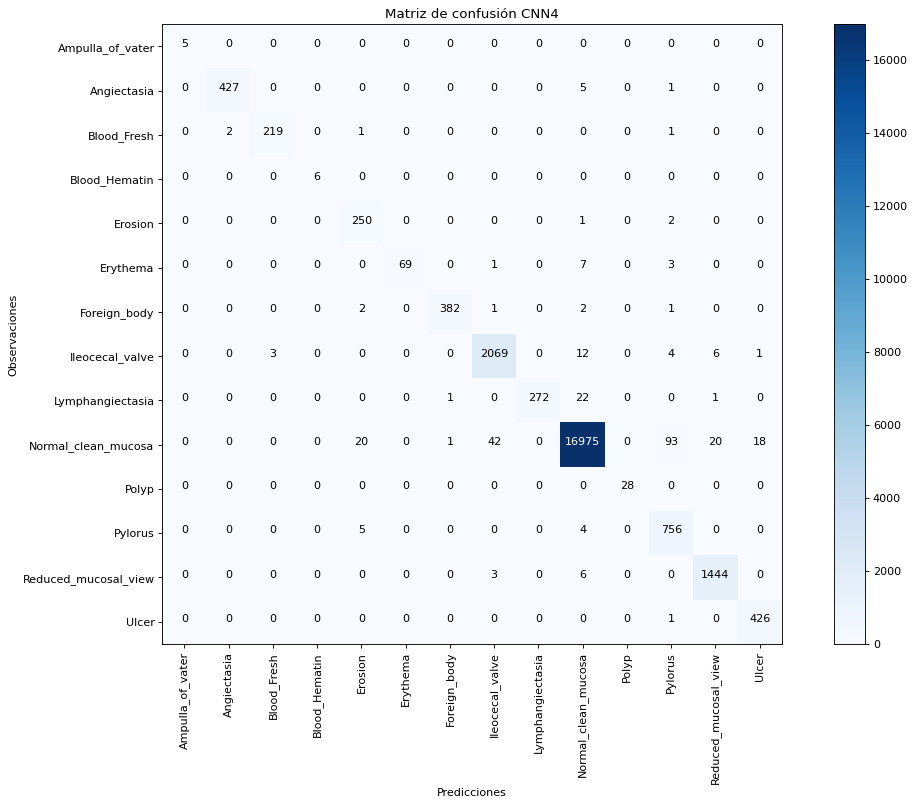

In [51]:
plot_confusion_matrix(cm=cm_CNN4_1_0,classes=cm_plot_labels,title="Matriz de confusión CNN4")

## **MEDIA DE LOS RESULTADOS DEL 2-FOLD**

**MEDIA DE LAS MATRICES DE CONFUSIÓN**

In [62]:
# Cálculo de las matrices de confusión para cada una de las estructuras que se han modelado:

# Matriz de confusión para el modelo D1:
cm_D1_m = ((cm_D1_0_1 + cm_D1_1_0) / 2).astype(int)

# Matriz de confusión para el modelo D2:
cm_D2_m = ((cm_D2_0_1 + cm_D2_1_0) / 2).astype(int)

# Matriz de confusión para el modelo CNN1:
cm_CNN1_m = ((cm_CNN1_0_1 + cm_CNN1_1_0) / 2).astype(int)

# Matriz de confusión para el modelo CNN2:
cm_CNN2_m = ((cm_CNN2_0_1 + cm_CNN2_1_0) / 2).astype(int)

# Matriz de confusión para el modelo CNN3:
cm_CNN3_m = ((cm_CNN3_0_1 + cm_CNN3_1_0) / 2).astype(int)

# Matriz de confusión para el modelo CNN4:
cm_CNN4_m = ((cm_CNN3_0_1 + cm_CNN3_1_0) / 2).astype(int)

Matriz de confusión sin normalizar
[[    0     0     0     0     0     0     0     0     0     4     0     0
      0     0]
 [    0    83     7     0     5     0     0     0     0   315     0    12
      0     9]
 [    0     4   140     0     3     0     5    24     0    30     0     9
      0     6]
 [    0     0     0     0     0     0     0     0     0     0     0     5
      0     0]
 [    1     0     2     0    17     0     1     5     0   208     0    15
      1     0]
 [    0     0     0     0     0    17     0     0     0    62     0     0
      0     0]
 [    0     1     0     0     2     0   166    13     2   194     0     4
      1     3]
 [    0     2     1     0     0     3     3  1392     1   651     0     0
     38     0]
 [    1     0     0     0     0     0     8     2    28   253     0     1
      1     0]
 [    1     3     6     0     3     0    31    96     9 16962     0    25
     25     4]
 [    0     0     0     0     0     0     1     9     0     5    12     0
 

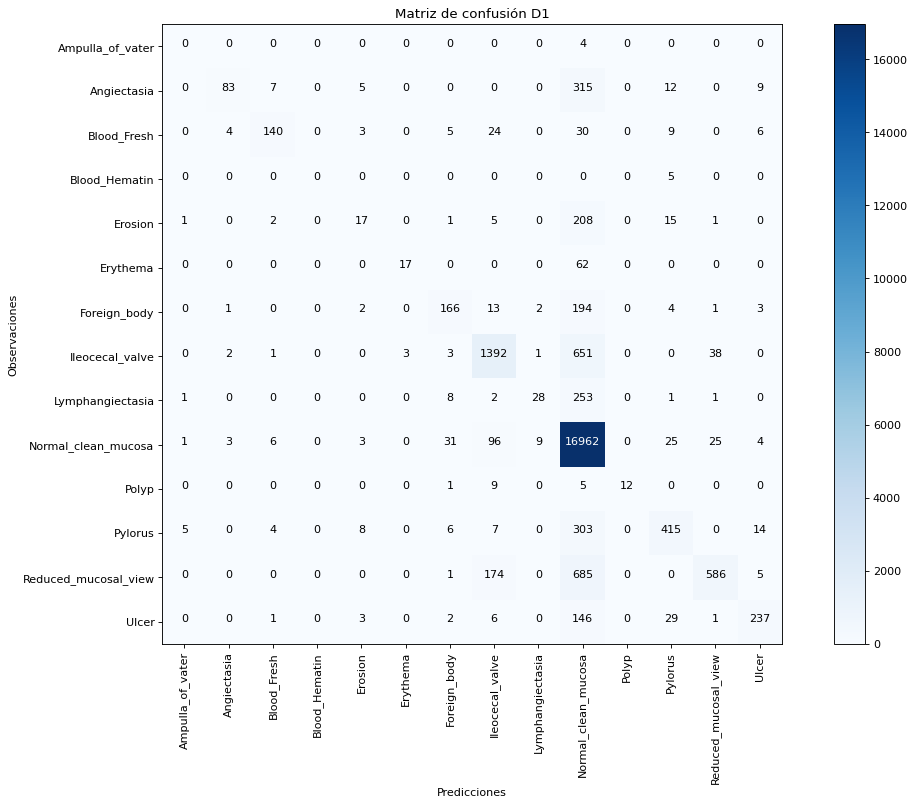

In [63]:
plot_confusion_matrix(cm=cm_D1_m,classes=cm_plot_labels,title="Matriz de confusión D1")

Matriz de confusión sin normalizar
[[    0     0     0     0     0     0     0     0     0     5     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0   433     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0   223     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0     6     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0   253     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0    79     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0   388     0     0
      0     0]
 [    0     0     0     0     0     0     0     1     0  2093     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0   296     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0 17169     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     0    27     0     0
 

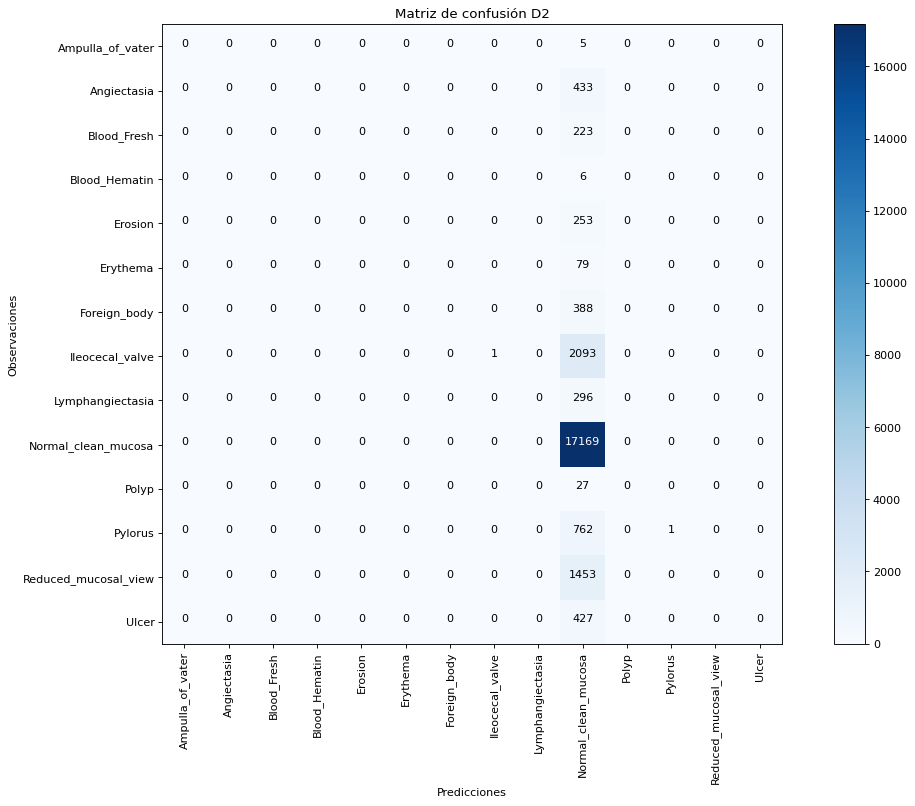

In [64]:
plot_confusion_matrix(cm=cm_D2_m,classes=cm_plot_labels,title="Matriz de confusión D2")

Matriz de confusión sin normalizar
[[    5     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0   338     0     0     1     0     0     0     0    87     0     4
      0     0]
 [    0     0   213     0     0     0     0     0     0     6     0     2
      0     0]
 [    0     0     0     6     0     0     0     0     0     0     0     0
      0     0]
 [    0     0     0     0   154     0     0     1     1    86     0     6
      2     1]
 [    0     0     0     0     0    33     0     0     0    44     0     0
      0     1]
 [    0     0     0     0     0     0   325     0     2    59     0     0
      0     0]
 [    0     2     0     0    10     0     2  1370     2   635     0    11
     48    11]
 [    0     0     0     0     1     0     2     0   228    63     0     0
      0     0]
 [    0    14     0     0    34     0    10    22    17 16934     0    68
     41    27]
 [    0     0     0     0     0     0     0     0     0     0    27     0
 

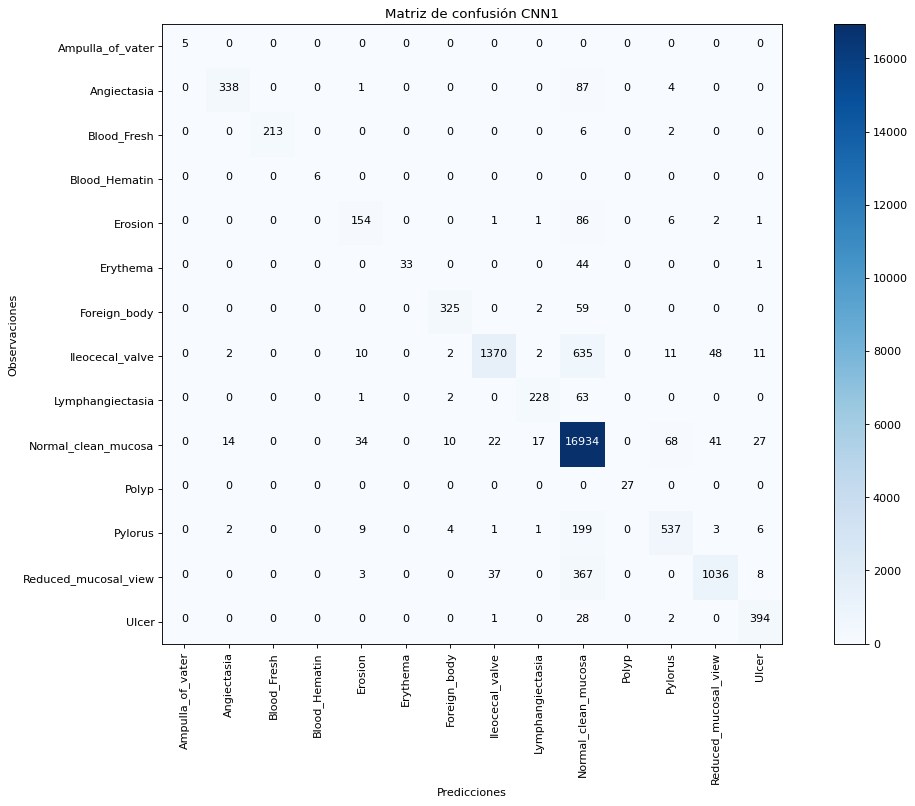

In [65]:
plot_confusion_matrix(cm=cm_CNN1_m,classes=cm_plot_labels,title="Matriz de confusión CNN1")

Matriz de confusión sin normalizar
[[    4     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0   361     0     0     0     0     0     0     0    64     0     5
      0     1]
 [    0     1   218     0     0     0     0     0     0     1     0     2
      0     0]
 [    0     0     0     6     0     0     0     0     0     0     0     0
      0     0]
 [    0     1     0     0   103     0     2     6     1   125     0    15
      0     0]
 [    0     0     0     0     0    54     0     0     0    24     0     1
      0     0]
 [    0     1     0     0     0     0   325     2     5    52     0     1
      0     0]
 [    0     0     8     0     1     0     4  1673     1   385     1     4
     14     1]
 [    0     0     0     0     0     0     0     0   256    38     0     0
      0     0]
 [    0    11     1     0     5     0    20    53    17 16950     0    89
     14     6]
 [    0     0     0     0     0     0     0     0     0     0    27     0
 

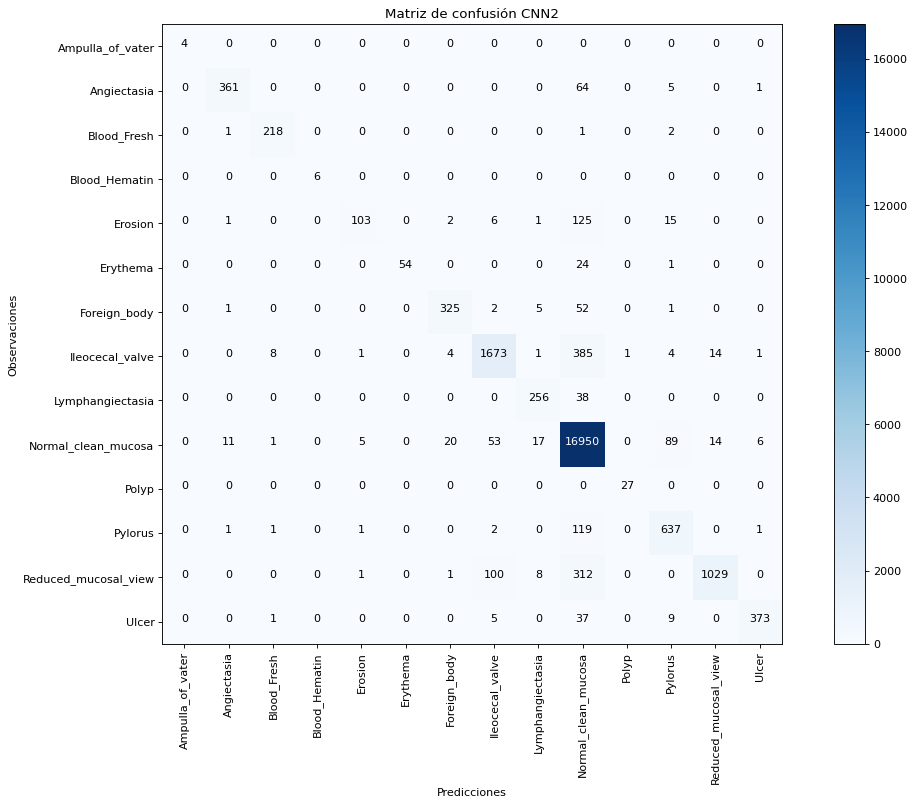

In [66]:
plot_confusion_matrix(cm=cm_CNN2_m,classes=cm_plot_labels,title="Matriz de confusión CNN2")

Matriz de confusión sin normalizar
[[    3     0     0     0     0     0     0     0     0     2     0     0
      0     0]
 [    0   403     1     0     1     0     0     2     0    21     0     3
      0     0]
 [    0     0   209     0     0     0     0     3     0     6     0     3
      0     0]
 [    0     0     0     5     0     0     0     0     0     0     0     0
      0     0]
 [    0     0     0     0   228     0     0     0     0    17     0     5
      0     2]
 [    0     0     0     0     0    69     0     0     0    10     0     0
      0     0]
 [    0     0     0     0     0     0   339     2     3    38     0     2
      1     0]
 [    0     0     0     0     1     0     0  2019     0    63     0     0
      9     0]
 [    0     0     0     0     1     1     0     0   276    18     0     0
      0     0]
 [    0     5     0     0    13    11     1    42     3 17064     0    14
      6     9]
 [    0     0     0     0     0     0     0     0     0     0    27     0
 

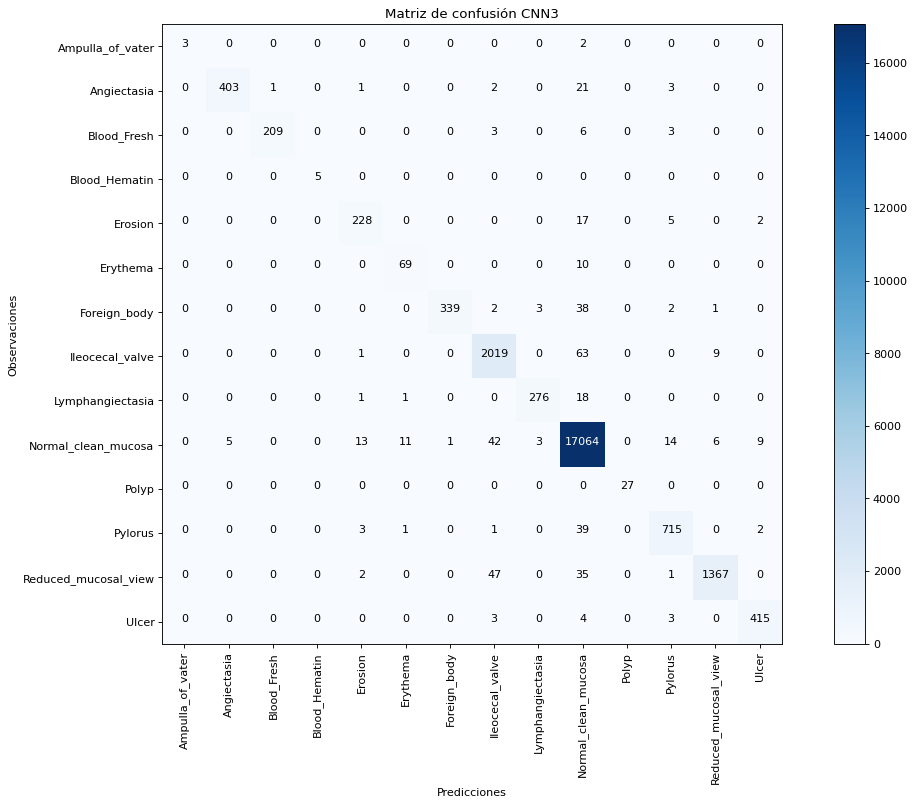

In [67]:
plot_confusion_matrix(cm=cm_CNN3_m,classes=cm_plot_labels,title="Matriz de confusión CNN3")

Matriz de confusión sin normalizar
[[    3     0     0     0     0     0     0     0     0     2     0     0
      0     0]
 [    0   403     1     0     1     0     0     2     0    21     0     3
      0     0]
 [    0     0   209     0     0     0     0     3     0     6     0     3
      0     0]
 [    0     0     0     5     0     0     0     0     0     0     0     0
      0     0]
 [    0     0     0     0   228     0     0     0     0    17     0     5
      0     2]
 [    0     0     0     0     0    69     0     0     0    10     0     0
      0     0]
 [    0     0     0     0     0     0   339     2     3    38     0     2
      1     0]
 [    0     0     0     0     1     0     0  2019     0    63     0     0
      9     0]
 [    0     0     0     0     1     1     0     0   276    18     0     0
      0     0]
 [    0     5     0     0    13    11     1    42     3 17064     0    14
      6     9]
 [    0     0     0     0     0     0     0     0     0     0    27     0
 

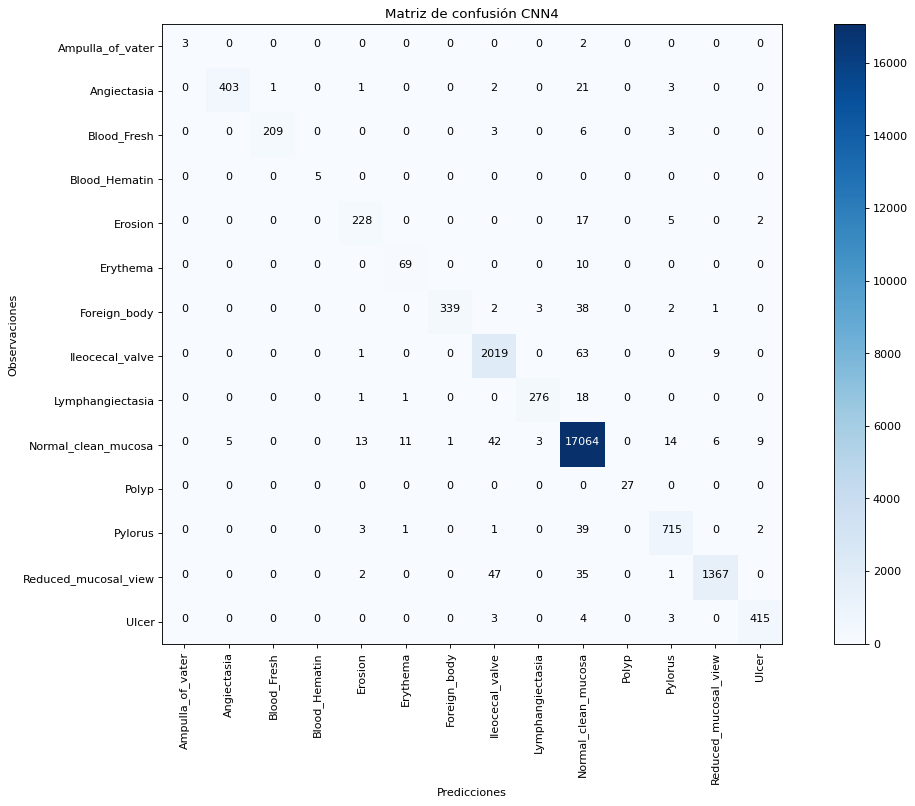

In [68]:
plot_confusion_matrix(cm=cm_CNN4_m,classes=cm_plot_labels,title="Matriz de confusión CNN4")

**ELECCIÓN DEL MEJOR MODELO**

In [ ]:
cm_list = [cm_D1_m, cm_D2_m, cm_CNN1_m, cm_CNN2_m, cm_CNN3_m, cm_CNN4_m]
cm_liststr = ["cm_D1_m", "cm_D2_m", "cm_CNN1_m", "cm_CNN2_m", "cm_CNN3_m", "cm_CNN4_m"]

cm_list_diag = []
cm_list_fneg = []

for x in cm_list:
  if 0 in sum(x):
    cm_list_diag.append(np.NaN)
    cm_list_fneg.append(np.NaN)
  else:
    sumdiag = x[0][0]+x[1][1]
    cm_list_diag.append(sumdiag)
    cm_list_fneg.append(x[0][1])

max_diag = np.nanmax(cm_list_diag)
ind_diag = cm_list_diag.index(max_diag)
print(cm_liststr[ind_diag])
# print("El modelo con la diagonal principal máxima es:" + cm_list[ind_diag])

min_fneg = np.nanmin(cm_list_fneg)
ind_fneg = cm_list_fneg.index(min_fneg)
print(cm_liststr[ind_fneg])
# print("El modelo con el valor mínimo de falsos negativos es:" + cm_list[ind_fneg])

In [ ]:
max_acc_m = (max_acc_0_1+max_acc_1_1) / 2

max_max_acc_m = max(max_acc_m)
ind_max_acc_m = max_acc_m.index(max_max_acc_m)
print(max_acc_m)
print(cm_liststr[ind_max_acc_m])
print(max_max_acc_m)

**GUARDAR LOS MODELOS**

In [ ]:
## GUARDAR EL MODELO COMPLETO: PARAMETROS, PESOS, TODO

mD1.save("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/Modelos/D1/14C_model_D1.h5")
mD2.save("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/Modelos/D2/14C_model_D2.h5")
mCNN1.save("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/Modelos/CNN1/14C_model_CNN1.h5")
mCNN2.save("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/Modelos/CNN2/14C_model_CNN2.h5")
mCNN3.save("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/Modelos/CNN3/14C_model_CNN3.h5")
mCNN4.save("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/14C/Modelos/CNN4/14C_model_CNN4.h5")